<a href="https://colab.research.google.com/github/ssprasad-cyber/Co2Emission_prediction-Simple-Linear-Regression-/blob/main/co2Emission_prediction(simple_Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [3]:
dts = pd.read_csv("/content/FuelConsumption.csv")

#dataset information
dts.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
dts.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
cdf = dts[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


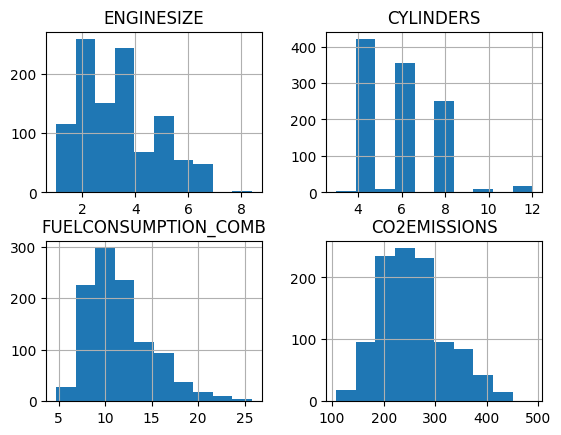

In [6]:
cdf.hist()
plt.show()

**DATA VISUALIZATION OF CO2 EMISSION**

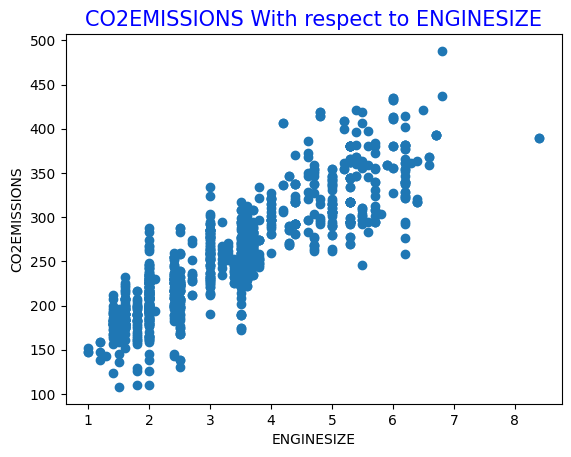

In [22]:
#enginesize -- co2emisions
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS)
plt.title("CO2EMISSIONS With respect to ENGINESIZE",color='blue',size=15)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

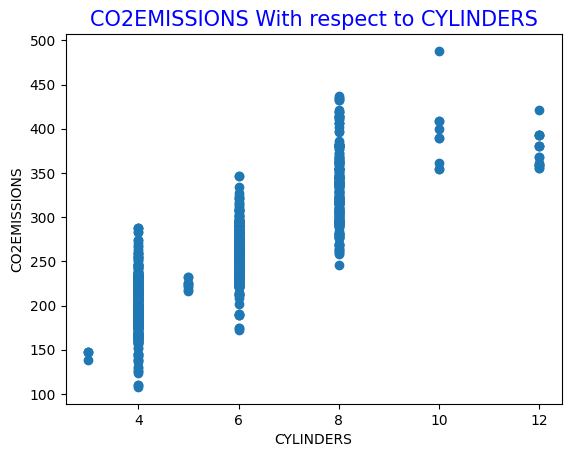

In [17]:
#CYLINDERS -- co2emisions
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS)
plt.title("CO2EMISSIONS With respect to CYLINDERS",color='blue',size=15)
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

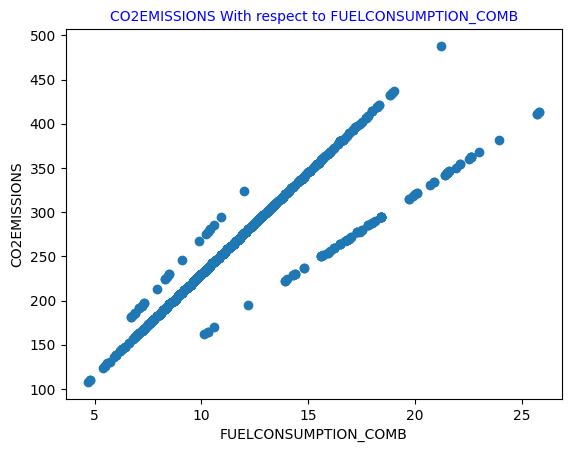

In [21]:
#FUELCONSUMPTION_COMB	 -- co2emisions
plt.scatter(cdf.FUELCONSUMPTION_COMB	,cdf.CO2EMISSIONS)
plt.title("CO2EMISSIONS With respect to FUELCONSUMPTION_COMB",color='blue',size=10)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

**TRAINING THE MODEL**


In [23]:
#TRAIN-TEST DATA SPLITING
msk = np.random.rand(len(dts)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [27]:
#train test data
print("train data: ",train.shape)
print("test data: ",test.shape)

train data:  (848, 4)
test data:  (219, 4)


In [24]:
#trained data
print(train)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
4            3.5          6                  10.6           244
5            3.5          6                  10.0           230
...          ...        ...                   ...           ...
1062         3.0          6                  11.8           271
1063         3.2          6                  11.5           264
1064         3.0          6                  11.8           271
1065         3.2          6                  11.3           260
1066         3.2          6                  12.8           294

[848 rows x 4 columns]


In [25]:
#test data
print(test)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
3            3.5          6                  11.1           255
8            3.7          6                  11.6           267
12           5.9         12                  15.6           359
15           4.7          8                  15.4           354
17           4.7          8                  15.4           354
...          ...        ...                   ...           ...
1033         2.0          4                   6.9           186
1034         1.8          4                   8.2           189
1036         2.0          4                   9.4           216
1049         2.0          4                   6.8           184
1050         3.6          6                  12.1           278

[219 rows x 4 columns]


# **MODELING**

---
*modeling data using sklearn package*


In [48]:
reg = linear_model.LinearRegression()
x_train = np.asanyarray(cdf[['ENGINESIZE']])
y_train = np.asanyarray(cdf[['CO2EMISSIONS']])
reg.fit(x_train,y_train)
# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[39.12519979]]
Intercept:  [125.3040995]


## plot output

Text(0, 0.5, 'CO2EMISSIONS')

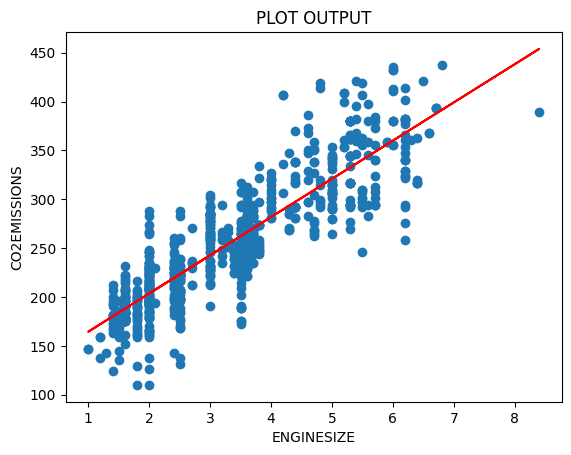

In [56]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)
plt.plot(x_train,reg.coef_[0][0]*x_train+reg.intercept_[0],'-r')
plt.title("PLOT OUTPUT")
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

In [75]:
#MODEL ERROR

x_test = np.asanyarray(cdf[['ENGINESIZE']])
y_test = np.asanyarray(cdf[['CO2EMISSIONS']])
output = reg.predict(x_test)
print("Mean Absolute Error : %.2f" % np.mean(np.absolute(output-y_test)))
print("Mean Squared Error (MSE) : %.2f" % np.mean((output-y_test) ** 2))
print("r2 score : %.2f" % r2_score(y_test,output))

Mean Absolute Error : 23.35
Mean Squared Error (MSE) : 946.31
r2 score : 0.76


# **MODEL**

In [84]:
#inputs for model ENGINESIZE (ES:3.5 co2 : 230 --input )
input = [3.5]
x_input = np.asanyarray([input])
opt =  reg.predict(x_input)
print(f"ENGINESIZE : {input} / CO2EMISSIONS is :",opt)

ENGINESIZE : [3.5] / CO2EMISSIONS is : [[262.24229875]]
